# <span style="color:green">Matlotlo Dhlamini
</span>

# <span style="color:blue"> Week 1 Geospatioal Processing and Analysis 
</span>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Merged_Chem.csv')
df

,Unnamed: 0,Unique ID,NTS Sheet,Latitude_NAD83,Longitude_NAD83,Old Zn,Old Cu,Old Pb,Old Ni,Old Co,...,New Ti,New Tl,New Tm,New U,New V,New W,New Y,New Yb,New Zn,New Zr
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,013L781002,013L,54.989093,-62.019071,40.0,38.0,NaN,43.0,10.0,...,0.021,0.03,0.10,0.3,31.0,NaN,6.04,0.64,44.0,0.9
2,2,013L781003,013L,54.975382,-62.030577,40.0,44.0,NaN,35.0,8.0,...,0.021,0.03,0.08,0.3,45.0,NaN,5.65,0.49,45.1,1.0
3,3,013L781004,013L,54.976331,-62.044913,46.0,30.0,NaN,34.0,8.0,...,0.023,0.04,0.09,0.3,17.0,NaN,7.19,0.64,51.4,0.8
4,4,013L781005,013L,54.973541,-62.054790,50.0,26.0,NaN,22.0,6.0,...,0.014,0.03,0.12,0.6,34.0,NaN,8.08,0.74,51.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,3437,023J783278,023J,54.483518,-66.172597,192.0,68.0,8.0,58.0,24.0,...,0.037,0.21,0.32,5.4,51.0,NaN,23.40,1.87,245.6,7.3
3438,3438,023J783279,023J,54.482485,-66.128816,132.0,32.0,3.0,28.0,6.0,...,0.022,0.09,0.18,1.9,25.0,NaN,12.76,1.01,140.3,6.0
3439,3439,023J783282,023J,54.483288,-66.094340,138.0,34.0,6.0,36.0,13.0,...,0.049,0.13,0.13,2.3,38.0,NaN,9.84,0.87,135.4,10.9
3440,3440,023J783283,023J,54.471281,-66.048911,168.0,46.0,6.0,25.0,7.0,...,0.009,0.08,0.16,1.6,10.0,NaN,14.21,1.07,179.3,2.6


In [3]:
df = df.drop(index=0)
df = df.reset_index(drop=True)

In [6]:
# Convert the "LOI" column to numeric
df['LOI'] = pd.to_numeric(df['LOI'], errors='coerce')

In [7]:
missing_values_sn = df['New Sn'].isnull().sum()  #Check for missing values
missing_values_sn

532

In [23]:
r2_scores= []  # To store R2 scores for each number of neighbours
neighbours_list = list(range(1, 100))  # A list for neighbours we want to test

# Loop through each number of neighbors
for n in neighbours_list:
    
    imputer = KNNImputer(n_neighbors=n, weights='distance')
    
    #Apply the imputation to a copy of our data
    df_temp = df.copy()
    df_temp['Imputed New Sn'] = imputer.fit_transform(df_temp[['New Sn']])
    
    # Histograms for original and imputed data
    original_hist = np.histogram(df_temp['New Sn'].dropna(), bins = 100)
    imputed_hist = np.histogram(df_temp['Imputed New Sn'], bins=100, range=(original_hist[1].min(), original_hist[1].max()))
    
    #R2 score for this number of neighbors
    score = r2_score(original_hist[0], imputed_hist[0])
    
    # Store the score
    r2_scores.append(score)




In [24]:
# Finding the optimal number of neighbours

best_neighbours = neighbours_list[np.argmax(r2_scores)]
best_score = max(r2_scores)
best_score

0.8030216820843415

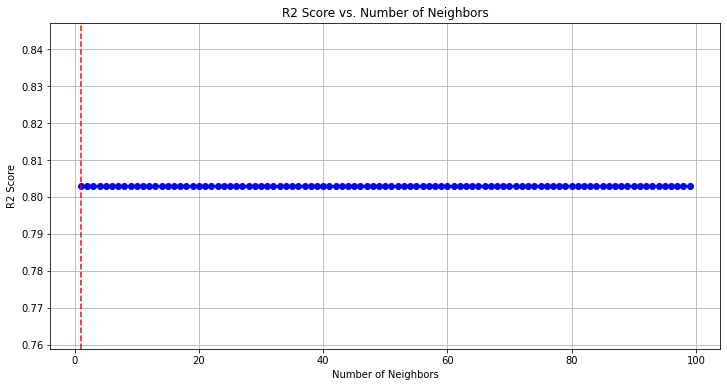

1

In [27]:
# Plot the R2 scores to visualize
plt.figure(figsize=(12, 6))
plt.plot(neighbours_list, r2_scores, marker='o', linestyle='-', color='b')
plt.axvline(x=best_neighbours, color='r', linestyle='--')
plt.title('R2 Score vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

best_neighbours


In [30]:
print(f'The best R2 Score is {best_score} and the optimal neighbor is {best_neighbours}')


The best R2 Score is 0.8030216820843415 and the optimal neighbor is 1


The optimal number of neighbours is 1 which gives a R^2 value of 0.803. This means that the optimal K for imputing a missing value is the nearest neighbour to the data point. Considering thatthe data is geographical this could mean that there may be localised mineral deposits/ chemical deposits hence making the value of the nearest neighbour/ clostest data the ideal means of estimating the value for the missing data point.

In [19]:
# Using the best number of neighbors:
best_imputer = KNNImputer(n_neighbors=best_neighbours, weights='distance')
df['Imputed New Sn'] = best_imputer.fit_transform(df[['New Sn']])


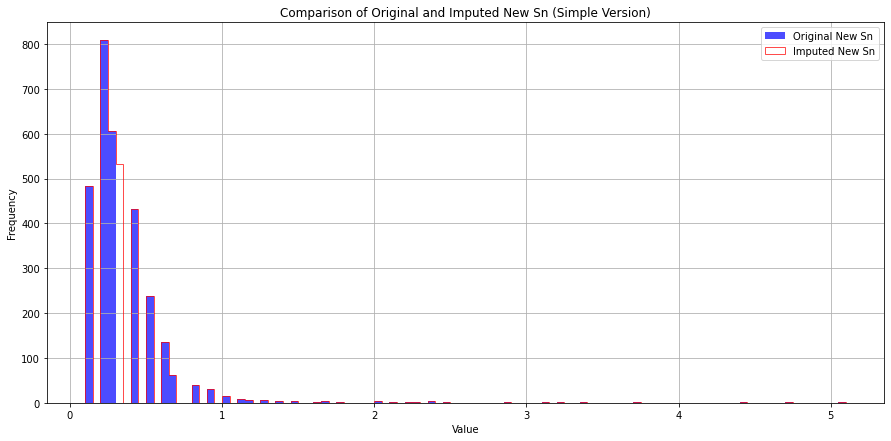

In [20]:
###Visualizing
plt.figure(figsize=(15, 7))

##Original 
plt.hist(df['New Sn'].dropna(), bins=100, color='blue', alpha=0.7, label='Original New Sn')

#Imputed 
plt.hist(df['Imputed New Sn'], bins=100, color='red', alpha=0.7, label='Imputed New Sn', histtype='step')

plt.title('Comparison of Original and Imputed New Sn (Simple Version)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

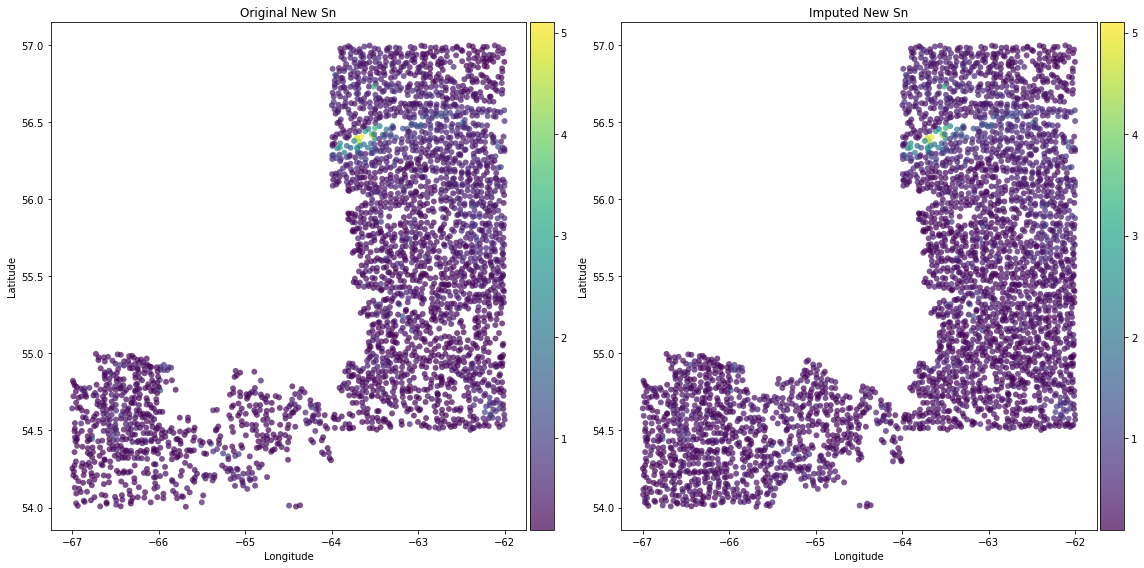

In [21]:
#Visualize on color map
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

#Original New Sn
sc1 = ax[0].scatter(df['Longitude_NAD83'], df['Latitude_NAD83'], c=df['New Sn'], 
                    cmap='viridis', s=35, alpha=0.7, edgecolor='none')
ax[0].set_title("Original New Sn")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
fig.colorbar(sc1, ax=ax[0], cax=cax0)

#Imputed New Sn
sc2 = ax[1].scatter(df['Longitude_NAD83'], df['Latitude_NAD83'], c=df['Imputed New Sn'], 
                    cmap='viridis', s=35, alpha=0.7, edgecolor='none')
ax[1].set_title("Imputed New Sn")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
fig.colorbar(sc2, ax=ax[1], cax=cax1)

plt.tight_layout()
plt.show()
